In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline

In [4]:
df = pd.read_csv("../output/csv/CrossCheck/percentages/AsimovFitNO_PercentageOfMC_Pseudo_Seed1031_0-99.csv", index_col=False)
# df = df[df['percentage'] != 'percentage']
df = df.astype(float)
df['n_chi2_tot'] = np.sqrt(df['n_chi2tr_no']**2 + df['n_chi2sh_no']**2)

In [5]:
## WATCH OUT, SENSITIVITIES OF AROUND 30 SIGMA. IS THIS ACTUALLY THE CHI2_TRUTH? OR IS IT SOMETHING ELSE? NOT SURE. 

df_true = pd.read_csv("../output/csv/CrossCheck/percentages/AsimovFitNO_PercentageOfMC_Pseudo_MCT_Seed1031_0-99.csv", index_col=False)
df_true = df_true.astype(float)
df_true['n_chi2_tot'] = np.sqrt(df_true['n_chi2tr_no']**2 + df_true['n_chi2sh_no']**2)

In [6]:
df_mean = df.groupby('percentage').mean().reset_index()
df_std  = df.groupby('percentage').std().reset_index()

df_mean_true = df_true.groupby('percentage').mean().reset_index()
df_mean_std = df_true.groupby('percentage').std().reset_index()

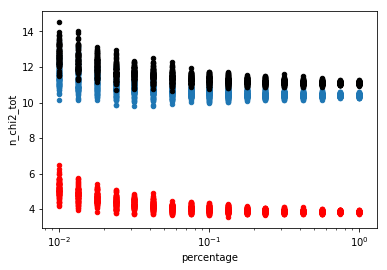

In [7]:
df.plot.scatter(x='percentage', y='n_chi2tr_no', logx=True)
ax1 = plt.gca()
df.plot.scatter(x='percentage', y='n_chi2sh_no', logx=True, ax=ax1, c='r')
df.plot.scatter(x='percentage', y='n_chi2_tot',  logx=True, ax=ax1, c='black')

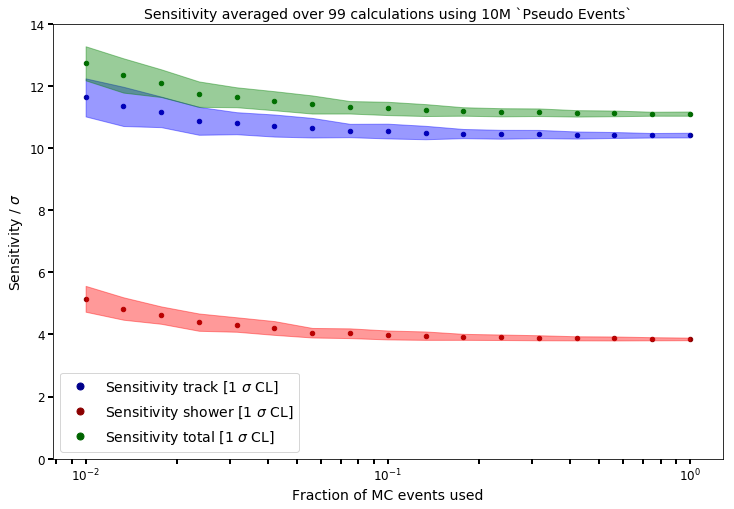

In [21]:
df_mean.plot.scatter(x='percentage', y='n_chi2tr_no', logx=True, figsize=(12,8), fontsize=12, color='DarkBlue')
ax1 = plt.gca()
df_mean.plot.scatter(x='percentage', y='n_chi2sh_no', logx=True, ax=ax1, color='DarkRed')
df_mean.plot.scatter(x='percentage', y='n_chi2_tot',  logx=True, ax=ax1, color='DarkGreen')

count = df[df['percentage'] == 0.01].count()[0]
plt.title(f"Sensitivity averaged over {count} calculations using 10M `Pseudo Events`", fontsize=14) # f string ftw


ax1.fill_between(df_mean['percentage'], df_mean['n_chi2tr_no'] + df_std['n_chi2tr_no'], df_mean['n_chi2tr_no'] - df_std['n_chi2tr_no'],
                 alpha=0.4, color='b')
ax1.fill_between(df_mean['percentage'], df_mean['n_chi2sh_no'] + df_std['n_chi2sh_no'], df_mean['n_chi2sh_no'] - df_std['n_chi2sh_no'],
                 alpha=0.4, color='r')
ax1.fill_between(df_mean['percentage'], df_mean['n_chi2_tot'] + df_std['n_chi2_tot'], df_mean['n_chi2_tot'] - df_std['n_chi2_tot'],
                 alpha=0.4, color='g')

ax1.tick_params(width=2, which='both', length=5)
plt.xlabel(r"Fraction of MC events used", fontsize=14)
plt.ylabel(r"Sensitivity / $\sigma$", fontsize=14)
plt.ylim(0,14)

# plt.legend(['Sensitivity track', 'Sensitivity shower', 'Sensitivity Total'], fontsize=14)

s_tr = mlines.Line2D([], [], color='DarkBlue', marker='.', linestyle='None', markersize=14, label=r'Sensitivity track [1 $\sigma$ CL]')
s_sh = mlines.Line2D([], [], color='DarkRed', marker='.', linestyle='None', markersize=14, label='Sensitivity shower [1 $\sigma$ CL]')
s_tot = mlines.Line2D([], [], color='DarkGreen', marker='.', linestyle='None', markersize=14, label='Sensitivity total [1 $\sigma$ CL]')
plt.legend(handles=[s_tr, s_sh, s_tot], fontsize=14, loc=3)